In [1]:
#Analisis esploratorio  de Data
#Cargamos el notebook
%load_ext watermark
%watermark


2018-12-23T12:39:54-06:00

CPython 3.6.7
IPython 7.2.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
#importar pandas
import pandas as pd

La magia de matplotlib %matplotlib notebook, es util para hacer mas visibles , pero es un poco complicada de usar ya que requiere el cerrar cada plot para poder continuar
Alternativamente se puede usar la magia de %matplotlib inline, que es mas sencilla ya que 
simplemente muestra nuestra grafica original en jupyter notebook. Para modificar el tamaño
en los plots en este caso basta con cambiar el parametro general de matplotlib figure.figsize al tamaño deseado (en pulgadas).

In [20]:
%matplotlib inline
#Importamos matplotlib
import matplotlib.pyplot as plt 
#Modificar los parametros
plt.rcParams["figure.figsize"]=(20,20)#10 in de ancho y 10 in de alto para todos los plots

En este apartado vamos a revisar el dataset.El objetivo es tener un dataset lo mas parecido al original pero sin fallos en el mismo que puedan llevarnos a sacer conclusiones 
erroneas.
El input de este paso es el output anterior

In [5]:
#Cargar el dataset
vehiculos=pd.read_csv("/home/jose/data/vehiculos1_original.csv")
vehiculos.head()
#La forma de la los datos
vehiculos.shape

(38436, 11)

Duplicados 
En este apartado se intenatn ver dos cosas:

    Asegurarse de que los datos no debiran estar duplicados no estan(por ejemplo,numeros       de telefono).
    Revisar si hay columnas que tenga una alto numero de duplicados, ya que no aporta         mucha informacion.
    
Recordemos que las entidades posibles eran:

    fabricante
    fabricante-modelo
    fabricante-modelo-año
    fabricante-año
    
 De estas entidades las unicas que no se deberian repetir coches especificos, es decir, fabricante+modelo+año


In [6]:
#Creamos una nueva columna en la que concatenamos el modelo y el año (el año se vuelve un string inicialmente es un flotante)
#y la union de los dos strings se hace con -
vehiculos["modelo_unico"]=vehiculos.fabricante.str.cat([vehiculos.modelo,vehiculos.year.apply(str)],sep="-")

In [7]:
#Contamos la contidad de vehiculos con el mismo año
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985                     24
Ford-F150 Pickup 2WD-1984                       19
GMC-C15 Pickup 2WD-1984                         19
Chevrolet-C10 Pickup 2WD-1984                   19
GMC-C15 Pickup 2WD-1985                         18
Chevrolet-S10 Pickup 2WD-1984                   18
Chevrolet-C10 Pickup 2WD-1985                   18
GMC-S15 Pickup 2WD-1984                         18
Chevrolet-C10 Pickup 2WD-1986                   17
GMC-C15 Pickup 2WD-1986                         17
Ford-Ranger Pickup 2WD-1984                     17
Mitsubishi-Truck 2WD-1984                       17
Dodge-Ram 50 Pickup 2WD-1984                    17
Ford-Escort-1984                                16
Ford-Escort-1985                                16
Mercury-Lynx-1984                               16
GMC-Vandura G15/25 2WD-1984                     16
Volkswagen-Rabbit-1984                          16
Ford-F150 Pickup 2WD-1985                       16
Chevrolet-G10/20 Van 2WD-1984  

In [8]:
#Nos damos cuenta que hay muchos repetidos 
vehiculos[vehiculos.modelo_unico=="Chevrolet-C1500 Pickup 2WD-1991"].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
4957,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4958,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4959,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4960,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4961,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991


Como podemos ver, cada modelo unico tiene diferentes configuraciones de cada coche(3 velocidades o 4 por ejemplo).
Por lo tanto, solo vamos a considerar duplicados aquellos records que sean identicos en todas sus columnas

In [9]:
#Observamos los elementos en el dataset duplicados
vehiculos[vehiculos.duplicated()].shape


(1506, 12)

In [10]:
#Cuando hay elemento duplicados los borramos como se muestra a continuacion
vehiculos=vehiculos.drop_duplicates()
vehiculos.shape

(36930, 12)

Borramos la columna de modelo 

In [11]:
del vehiculos["modelo_unico"]

In [12]:
#Ahora falta ver si hay variables en las que haya una gran cantidad de records que tengan el mismo valor(cardinalidad)
n_records=len(vehiculos)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor=df[columna].value_counts()
        mas_comun=n_por_valor.iloc[0]
        menos_comun=n_por_valor.iloc[-1]
        print("{} | {} - {} |{}".format(
            df[columna].name,
            round(mas_comun/(1.0*n_records),3),
            round(menos_comun/(1.0*n_records),3),
            df[columna].dtype))

valores_duplicados_col(vehiculos)


fabricante | 0.1 - 0.0 |object
modelo | 0.005 - 0.0 |object
year | 0.038 - 0.007 |int64
desplazamiento | 0.095 - 0.0 |float64
cilindros | 0.38 - 0.0 |float64
transmision | 0.287 - 0.0 |object
traccion | 0.353 - 0.005 |object
clase | 0.145 - 0.0 |object
combustible | 0.652 - 0.0 |object
consumo | 0.097 - 0.0 |int64
co2 | 0.084 - 0.0 |float64


Vemos que los campos traccion, transmision, cilindros y combustible pueden tener un problema de valores repetidos, en realidad 30% no es muy dramatico , el problema seria si el mas comun tuviera un  90 %

In [15]:
#imprimir el valor de conteo para cada tipo de  traccion
print(vehiculos.traccion.value_counts())
#Inprimir el valor normalizado en porcentaje
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             13018
Rear-Wheel Drive              12750
4-Wheel or All-Wheel Drive     6408
All-Wheel Drive                2252
4-Wheel Drive                  1116
2-Wheel Drive                   412
Part-time 4-Wheel Drive         177
Name: traccion, dtype: int64


Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

Vemos que esto tiene sentido, ya que la inmensa mayoria de los vehiculos tienen una traccion a dos 
ruedas, sean delanteras o traceras. En este caso alguien con el conocimiento de dominio podria 
darse cuenta de que problamente 2 wheel Drive sea simplemente una clasificacion distinta de Front o Rear.


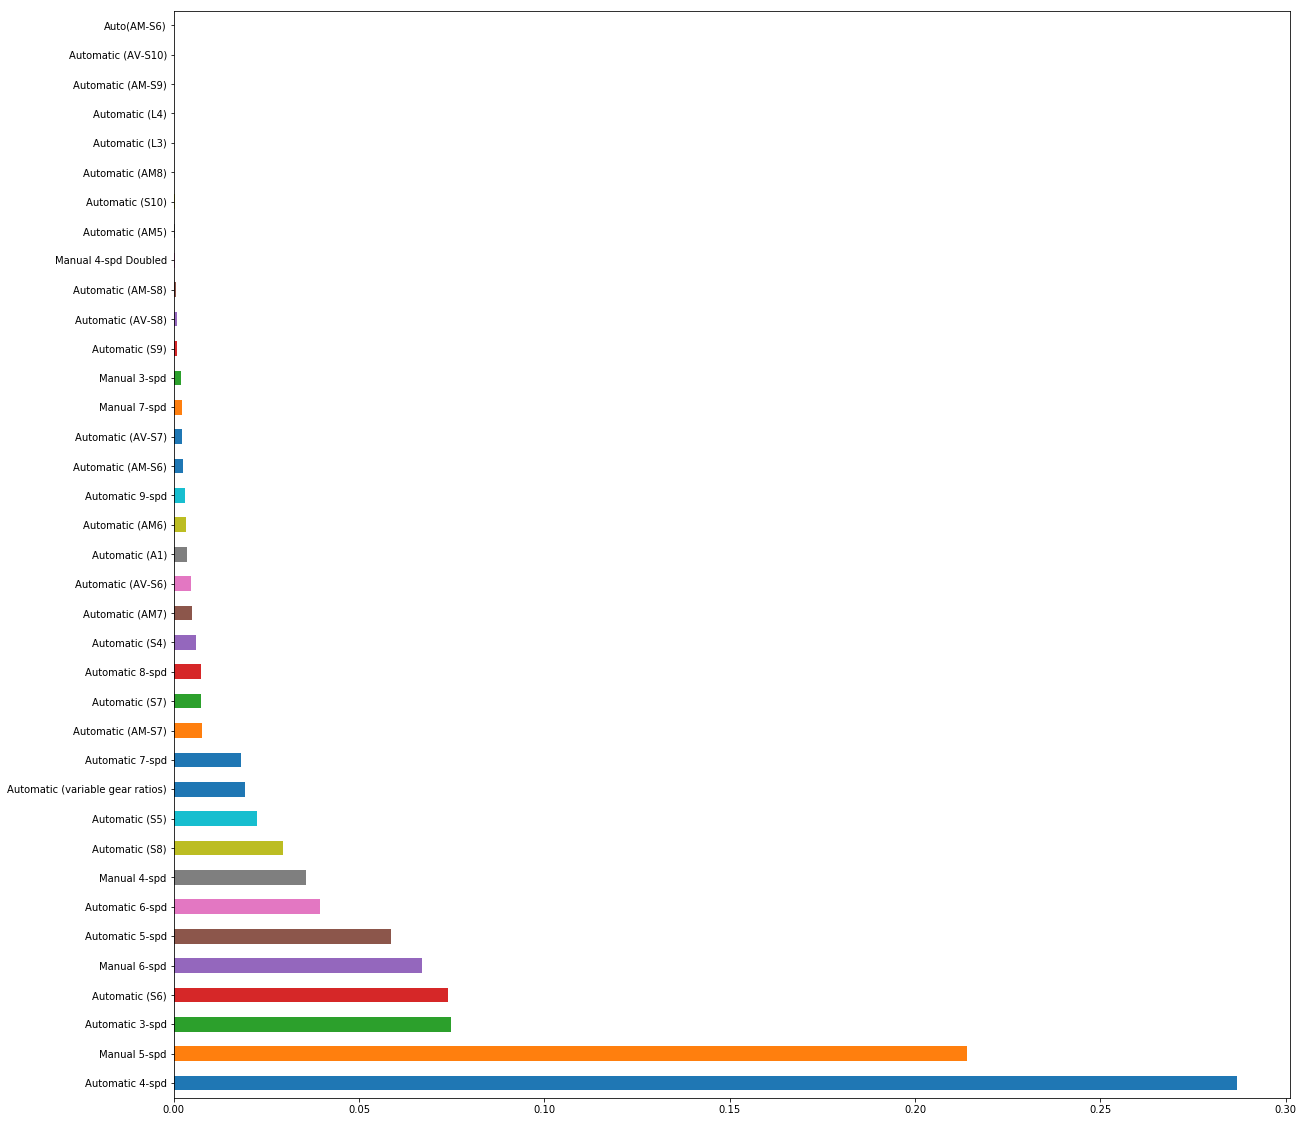

In [21]:
vehiculos.transmision.value_counts(normalize=True).plot.barh();

Veamos que aunque la transmision tenga una cardinalidad relativamente alta, en realidad muestra 
una distribucion con dos tipos de clases mayoritarias.

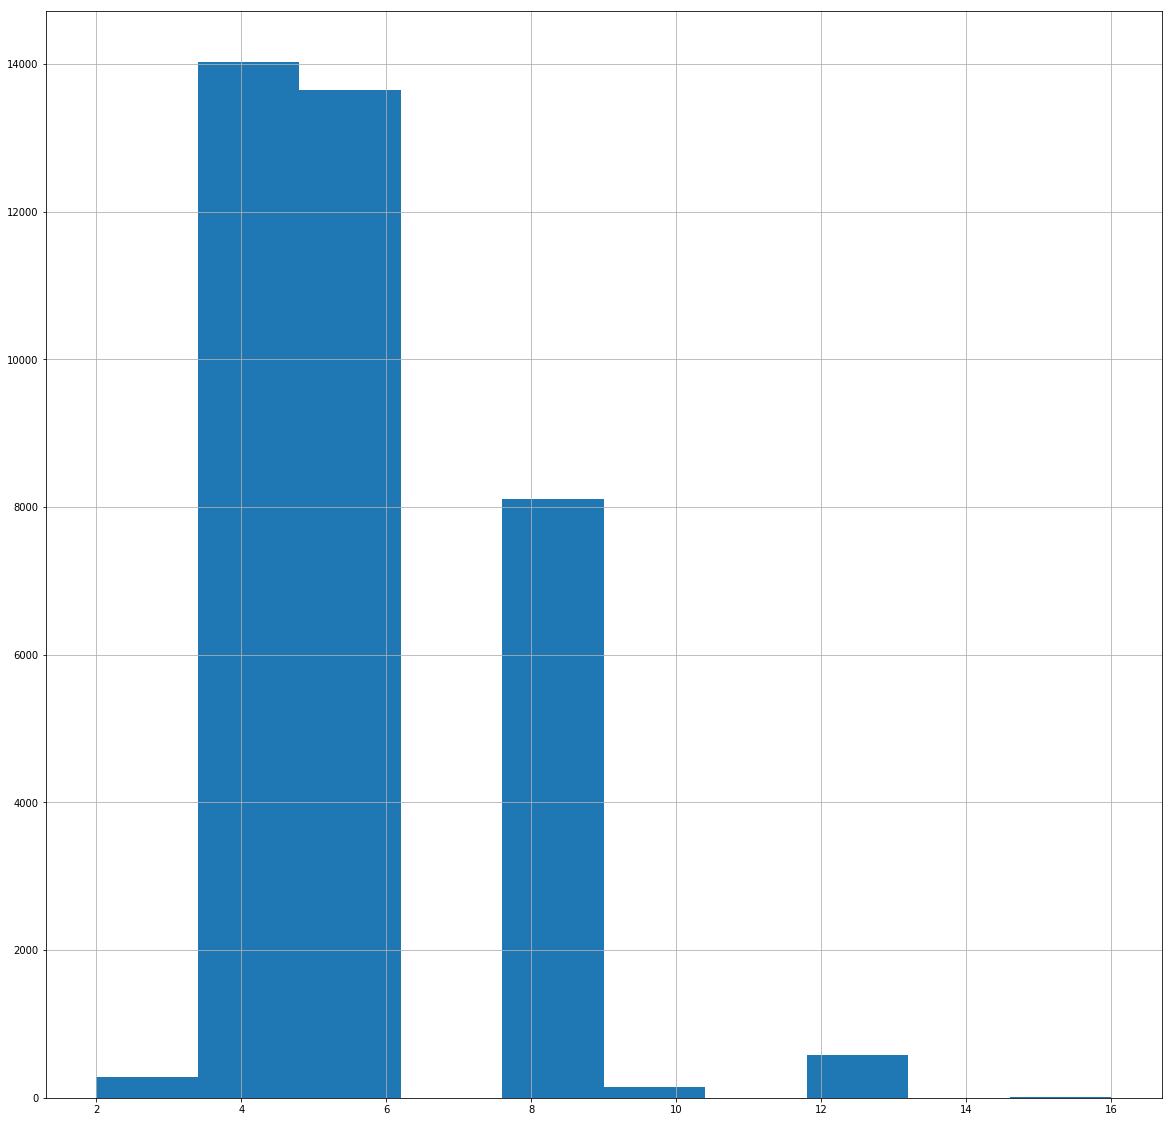

In [22]:
vehiculos.cilindros.hist()

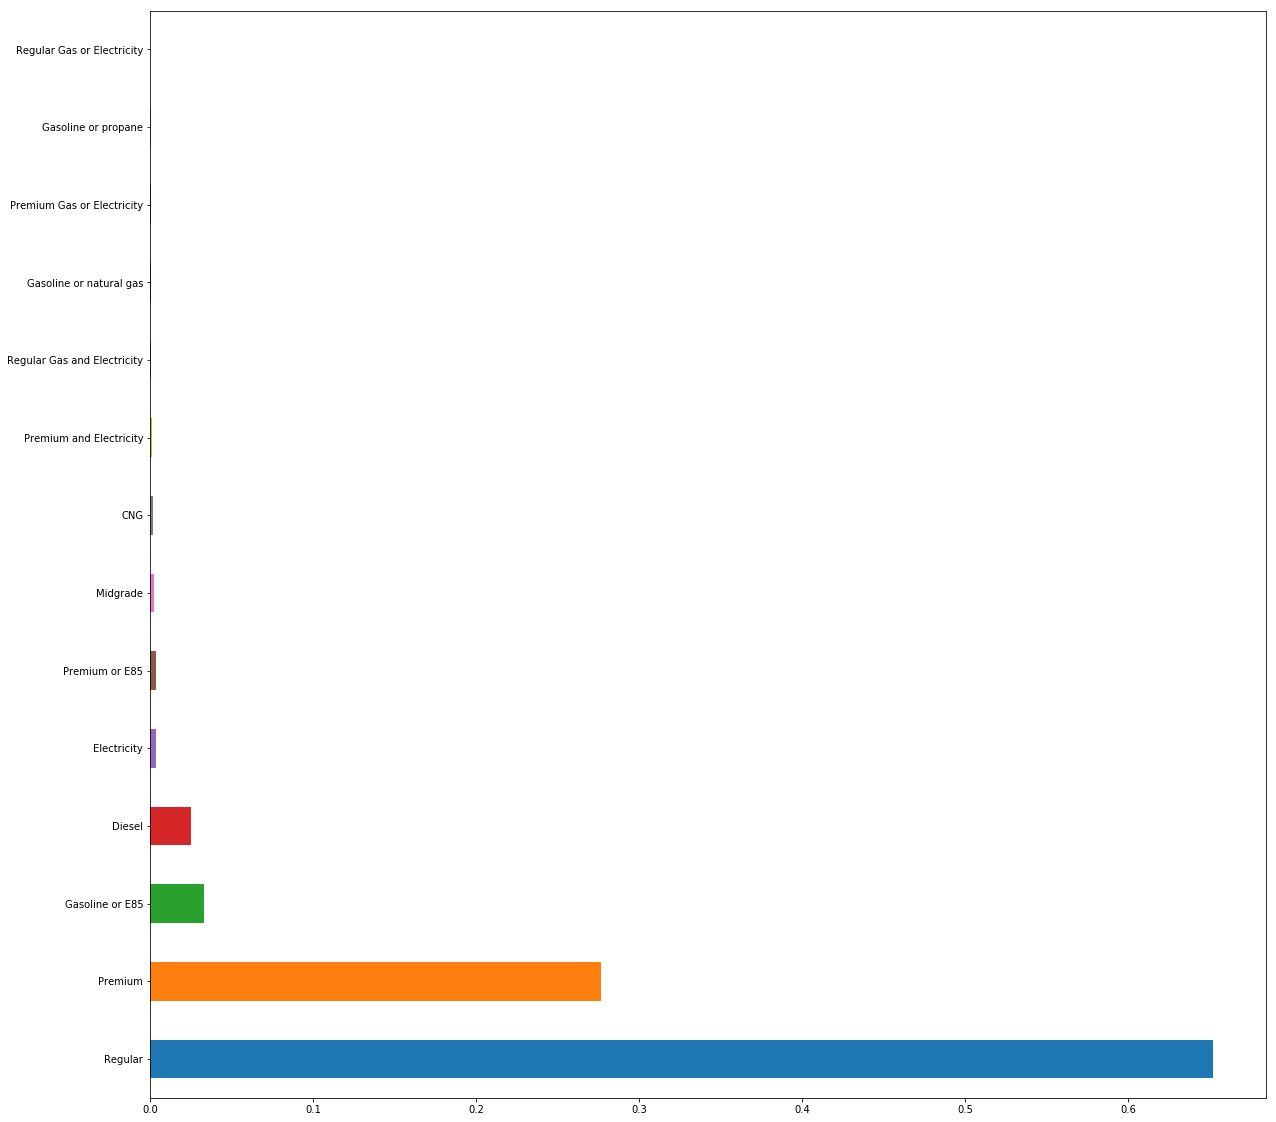

In [23]:
vehiculos.combustible.value_counts(normalize=True).plot.barh()

Vemos que la columna combustible si puede tener un problema al tener un 65%
de los casos 65% de los casos gasolina Regular

# Valores Inexistentes

In [26]:
n_records=len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
        df[columna].name,len(df[df[columna].isnull()])/(1.0*n_records),df[columna].dtype
        ))
valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


La anterior funcion recive como parametro el data frame, e itera para cada columna en el data frame
imprimindo el nombre de la columna, el porcentaje de campos vacios y el tipo de dato en la columna
por ultimo pasamos como parametro el data frame de vehiculos a la funcion

Vemos que el cmpo traccion,cilindro y transmicion tienen valores inexistentes.
Sin embargo son cantidades despresiables(el maximo es la variable traccion con un 3% inexistente)

# Valores extremos(outliers)

Para detectar valores extremos una medida general es  considerar aquellos outliers cuyos valores con una puntuacion Z(z score) es mayor de 3 , esto es, que se alejan 3 veces o mas de la desviacion standard de la media 
$$z(x)=\frac{x-\mu}{\sigma}$$

z es al valor de muestreo restarle la media , y dividirlo entre la desviacion estandar
.Lo cual nos dice cuantas desviacines estandars una medicion esta alejada de la media 

In [35]:
from scipy import stats
import numpy as np


def outliers_col(df):
    for columna in df:
        #Para cada columna con variable numerica 
        if vehiculos[columna].dtype!=np.object:
            #Los numeros mayores que 3 del valor de Z 
            n_outliers=len(vehiculos[np.abs(stats.zscore(vehiculos[columna]))>3])
            print("{}| {} |{}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
            ))          
outliers_col(vehiculos)            

year| 0 |int64
desplazamiento| 0 |float64
cilindros| 0 |float64
consumo| 233 |int64
co2| 358 |float64


/home/jose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


Vemos que las variables de consumo y co2 tienen outliers. Podemos hacer un boxplot para visualizar esto mejor

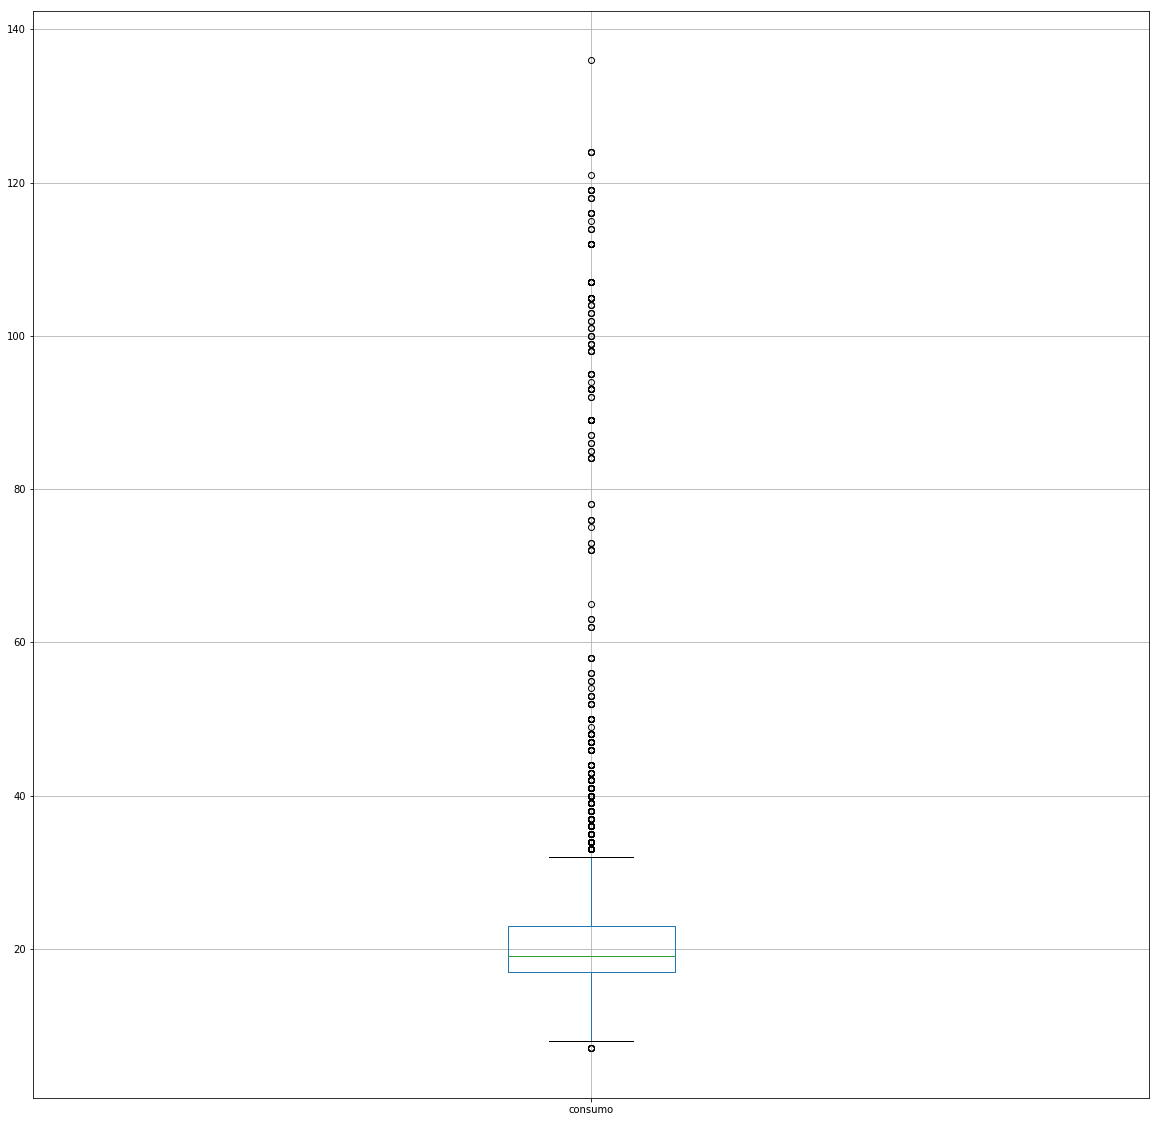

In [36]:
vehiculos.boxplot(column="consumo")

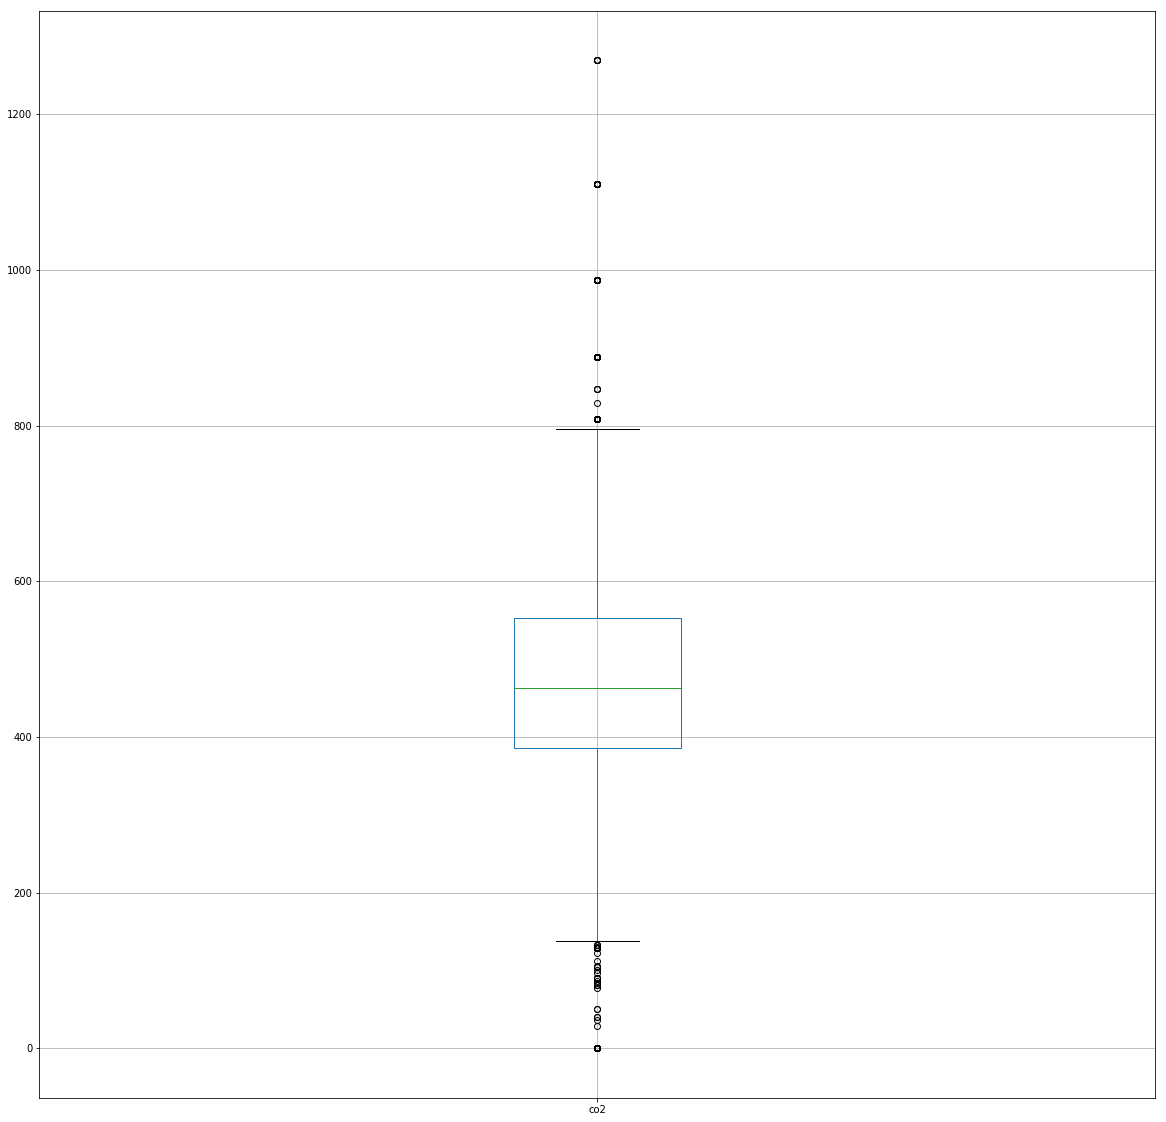

In [37]:
vehiculos.boxplot(column="co2")

Vemos en cuanto al consuo hay unos coches que contaminan mas de lo normal y otros que contaminan menos de lo normal,
tambien vemos que hay coches que no contaminan nada!

In [38]:
vehiculos[vehiculos.co2==0].combustible.unique()

array(['Electricity'], dtype=object)

In [39]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

Vemos que en este dataset hay vehiculos hibridos y vehiculos electricos puros .Dado que el objetivo es la contaminacion , convendria remover al  menos los vehiculos que no contaminan!

In [40]:
vehiculos_no_electricos=vehiculos[vehiculos.co2>0]

Ya que hemos descubierto esto, volvamos a revisar los datos con el  nuevo dataset

In [43]:
outliers_col(vehiculos_no_electricos)

year| 0 |int64
desplazamiento| 0 |float64
cilindros| 0 |float64
consumo| 233 |int64
co2| 358 |float64


/home/jose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


In [44]:
valores_duplicados_col(vehiculos_no_electricos)

fabricante | 0.099 - 0.0 |object
modelo | 0.005 - 0.0 |object
year | 0.038 - 0.007 |int64
desplazamiento | 0.095 - 0.0 |float64
cilindros | 0.38 - 0.0 |float64
transmision | 0.287 - 0.0 |object
traccion | 0.351 - 0.005 |object
clase | 0.145 - 0.0 |object
combustible | 0.652 - 0.0 |object
consumo | 0.097 - 0.0 |int64
co2 | 0.084 - 0.0 |float64


# Valores Inexistentes


In [45]:
valores_inexistentes_col(vehiculos_no_electricos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 5.415651232060655e-05 | float64
cilindros | 8.123476848090982e-05 | float64
transmision | 5.415651232060655e-05 | object
traccion | 0.021364744110479283 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Ahora veremos que no hay valores inexistentes en ninguna variable. La variable con mayor numero de valores inexixtentes es la traccion .
(2%), Obiamente los coches electricos no tienen motor de gasolina y por lo tanto, no tienen cilindros.

# Conclusiones
    Hay 1506 records duplicados(los hemos removido)
    Las variables desplazamiento, cilindros, transmision y traccion tiene valores inexistentes
    La variable combustible tiene una clase dominante(65% de los coches tienen combustible Regular).
    Hay un outlier en la cantidad de coches con una variable de 2018.
    Hay coches hibridos y coches electricos (hemos removido estos ultimos porque no contaminan).

# Exportamos

In [48]:
vehiculos_no_electricos.to_csv(("/home/jose/data/vehiculos_2_limpio_analisis.csv"),index=False)